In [1]:
from sympy import *
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def input_data():
    try:
        U = input("Введите функцию полезности потребителя U(x,y): ")
        p = int(input("Введите цену товара (p): "))
        q = int(input("Введите цену товара (q): "))
        I = int(input("Введите доход потребителя (I): "))
    except ValueError:
        print("Ошибка ввода!")
        return None
    except KeyboardInterrupt:
        print("Прервано пользователем")
        return None
    return (U,p,q,I)

def check_data(varible):
    try:
        sympify(varible)
    except SympifyError:
        print("Неверный ввод")
        return False
    return True

In [3]:
my_functions = input_data()

if my_functions != None:
    result_of_check = check_data(my_functions[0])
    if result_of_check != False:
        print("Выражение введено верно, можете приступать к вычислениям!")
    else:
        print("Упс... Что-то пошло не так, видимо, ошибка в введенном вами выражении, попробуйте ввести его еще раз!")
else:
    print("Вы ошиблись, попробуйте ввести выражение и данные еще раз!")

Введите функцию полезности потребителя U(x,y): 7 * ln(x-6) + 3 * ln(y-2)
Введите цену товара (p): 17
Введите цену товара (q): 2
Введите доход потребителя (I): 2108
Выражение введено верно, можете приступать к вычислениям!


# Вариант 13
#### U(x,y) = 7 * ln(x-6) + 3 * ln(y-2)
#### p = 17
#### q = 2
#### I = 2108

In [4]:
U,p,q,I = my_functions
print(U)
print()
print(p)
print()
print(q)
print()
print(I)

7 * ln(x-6) + 3 * ln(y-2)

17

2

2108


#### Преобразуем строковое выражение в общее математическое выражение

In [5]:
U_E = sympify(U)
print(U_E)

7*log(x - 6) + 3*log(y - 2)


### Задаем ограничения

In [6]:
#ограничения:
from scipy.optimize import Bounds
#x >= 6, y >= 2, x <= inf, y <= inf
bounds = Bounds([6.00001, 2.00001], [np.inf, np.inf])
#линейные ограничения
from scipy.optimize import LinearConstraint
# 0<=17x + 2y<=2108
linear_constraint = LinearConstraint([[p, q]], [0], [I])

Получаем результат

In [7]:
result = optimize.minimize(lambda x: -lambdify(["x", "y"], U_E)(x[0], x[1]), x0=(7,3), 
                        method='trust-constr',
                       bounds=bounds, constraints=linear_constraint)
result

 barrier_parameter: 6.400000000000003e-06
 barrier_tolerance: 6.400000000000003e-06
          cg_niter: 36
      cg_stop_cond: 1
            constr: [array([2107.99871855]), array([ 88.43519939, 302.30016447])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.6214957237243652
               fun: -47.99843522729802
              grad: array([-0.08491518, -0.00999001])
               jac: [array([[17,  2]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([-3.63129978e-10,  3.08606449e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 63
              nhev: 0
               nit: 27
             niter: 27
              njev: 21
        optimality: 3.0860644872068257e-09
            status: 1
           success: True
         tr_radius: 4502491.554961475
                 v: [array([0.00499502]), a

In [8]:
result.x

array([ 88.43519939, 302.30016447])

In [9]:
x_max, y_max, extremum = result.x[0], result.x[1], -result.fun

In [10]:
print(extremum)
print(x_max, y_max)

47.99843522729802
88.43519938851517 302.3001644749097


Строим графики

In [33]:
def draw_matplot_lib():
    plt.figure()
    ax = plt.figure().add_subplot(projection='3d')
    x = np.linspace(7, x_max * 10)
    y = np.linspace(3, y_max * 10)
    X, Y = np.meshgrid(x, y)
    Z = lambdify(['x', 'y'], U_E)(X, Y)
    ax.scatter(x_max, y_max, extremum, color='red', s=20, marker='o', alpha = 1)
    
    ax.text(x_max + 2, y_max + 2, extremum + 2, f'M*{int(x_max), int(y_max)}', color='red')
    
    ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, alpha = 0.5, cmap = 'viridis')
    plt.title("График функции полезности")
    plt.xlabel("Цена единицы товара x1")
    plt.ylabel("Цена единицы товара x2")
    plt.show()

<Figure size 432x288 with 0 Axes>

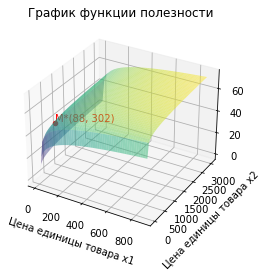

In [34]:
draw_matplot_lib()

In [42]:
def draw_contour():
    x, y = np.mgrid[7:x_max * 5,3:y_max * 5]
    z = lambdify(["x", "y"], U_E)(x, y)
    fig, ax = plt.subplots()
    ax.contour(x, y, z, levels=10)
    x1 = np.linspace(q+1, (I/p))
    y_treug = (I - p * x1) / q
    y_2 = 0
    fig2 = ax.fill_between(x1, y_2, y_treug)
    fig2.set_facecolor('green')
    fig2.set_label("бюджетное ограничение")
    cr = ax.contour(x, y, z, levels=[extremum], colors="red")
    cr.collections[0].set_label("Кривая безразличия")
    fig.set_figwidth(6)
    fig.set_figheight(6)
    plt.title("График функции полезности")
    plt.xlabel("Цена единицы товара x1")
    plt.ylabel("Цена единицы товара x2")
    plt.plot(x_max, y_max, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
    plt.text(x_max + 50,y_max + 30,f'M*{int(x_max), int(y_max)}',horizontalalignment='right') 
    plt.legend()
    plt.show()

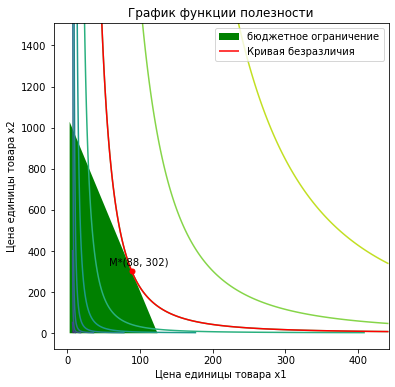

In [43]:
draw_contour()

In [44]:
print("ОТВЕТ: ")
print(f"Оптимальный план = {int(x_max), int(y_max)}, Максимальная прибыль = {extremum}")

ОТВЕТ: 
Оптимальный план = (88, 302), Максимальная прибыль = 47.99843522729802
